# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

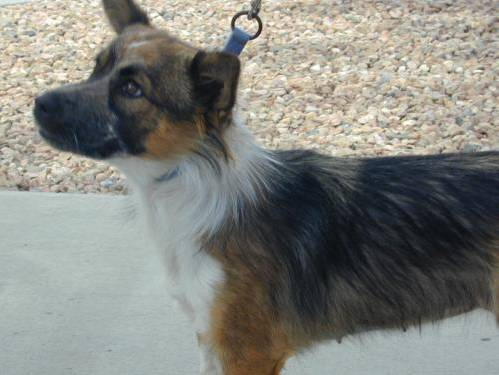

In [1]:
from IPython.display import Image
Image(filename = 'D:/Python/venvs/datasets/cachorrogato/train/dogs/dog.3.jpg')

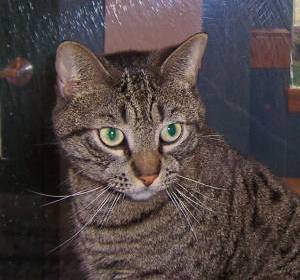

In [2]:
Image(filename = 'D:/Python/venvs/datasets/cachorrogato/train/cats/cat.1.jpg')

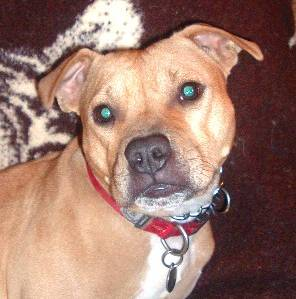

In [3]:
Image(filename = 'D:/Python/venvs/datasets/cachorrogato/test1/test1/2.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [4]:
import tensorflow as tf

In [5]:
import keras as K

In [6]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [7]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [8]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Testando Terceira Camada de Convolução
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Testando Quarta Camada de Convolução
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

d:\Python\venvs\env_projLIA\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('D:/Python/venvs/datasets/cachorrogato/train/',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


**Treinamento do Modelo**

In [11]:
#Bibliotecas faltantes
#!pip install Pillow
#!pip install scipy

In [12]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=30,
               epochs=25)

Epoch 1/25


d:\Python\venvs\env_projLIA\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.4775 - loss: 0.8797
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.4971 - loss: 0.6931
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.5108 - loss: 0.6911
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.5751 - loss: 0.6760
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.5819 - loss: 0.6591
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.6189 - loss: 0.6485
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.6482 - loss: 0.6223
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.6648 - loss: 0.5931
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.6800 - loss: 0.5875
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.6716 - loss: 0.6065
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.6384 - loss: 0.6280
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.7240 - l

C:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.7371 - loss: 0.5355
Epoch 16/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.6788 - loss: 0.6184
Epoch 17/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.7261 - loss: 0.5506
Epoch 18/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.7055 - loss: 0.5711
Epoch 19/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.7107 - loss: 0.5589
Epoch 20/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.7279 - loss: 0.5320
Epoch 21/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.7307 - loss: 0.5547
Epoch 22/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.7566 - loss: 0.5142
Epoch 23/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.7568 - loss: 0.4867
Epoch 24/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.7582 - loss: 0.5031
Epoch 25/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.7115 - loss: 0.5515


Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


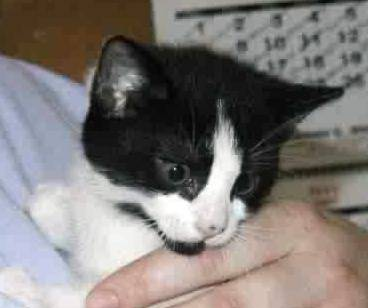

In [22]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/50.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
#print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/50.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


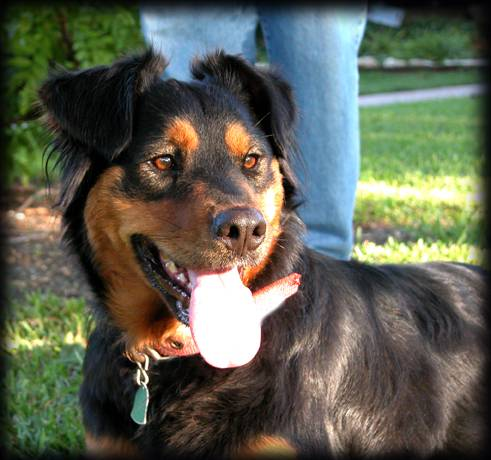

In [21]:
# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/190.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
#print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/190.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Previsão: Cachorro.
Acurácia: 100.0 %.


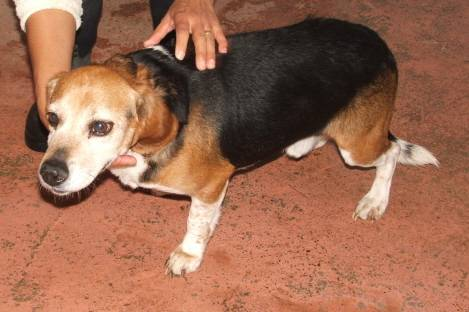

In [15]:
# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/201.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/201.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Previsão: Gato.
Acurácia: 100.0 %.


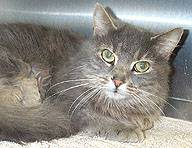

In [20]:
# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/7.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
#print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/7.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


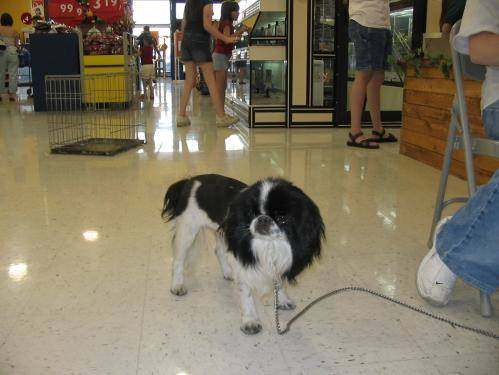

In [23]:
# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/400.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
#print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/400.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


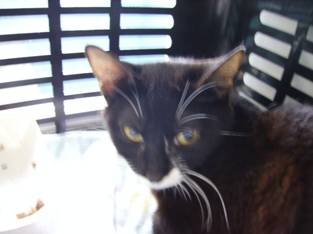

In [24]:
# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/600.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
#print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/600.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


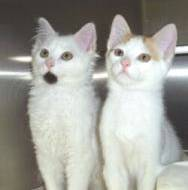

In [25]:
# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/894.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
#print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/894.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


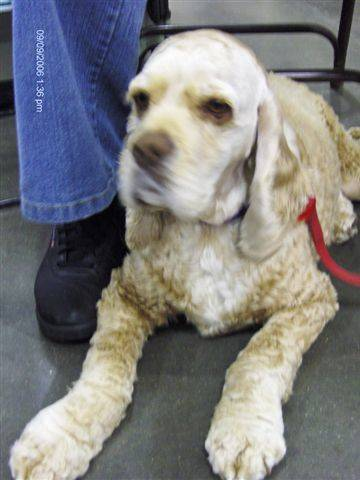

In [26]:
# Carregando a imagem de teste
test_image = image.load_img('D:/Python/venvs/datasets/cachorrogato/test1/test1/555.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices
#print("\n")
#print(class_indices)
#print(result)
#print("\n")

# A previsão vai de 0 a 1, quanto mais próximo do zero, maior a chance de ser gato,
# e quanto mais próximo do 1 maior a chance de ser cachorro, logo, indicar result[0][0] == 1,
# seria um erro.

if result[0][0] >= 0.5:     
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
    

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='D:/Python/venvs/datasets/cachorrogato/test1/test1/555.jpg')

**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥